## How to correct the fish-eye effect in gopro pictures

### Authors: Oliver Stein contact@oliverstein.org

#### Importing necessary modules

In [81]:

import sys
import os
print('Python Version:',sys.version)

import numpy as np
print('Numpy Version:',np.__version__)
import pandas as pd
print('Pandas Version:',pd.__version__)

import scipy
print('Scipy Version:',scipy.__version__)
from scipy.ndimage import gaussian_filter

import matplotlib
print('Matplotlib Version:',matplotlib.__version__)
import matplotlib.image as img
import matplotlib.pyplot as plt

%matplotlib inline  

Python Version: 3.7.2 (default, Feb 11 2019, 14:11:50) [MSC v.1915 64 bit (AMD64)]
Numpy Version: 1.17.4
Pandas Version: 0.25.3
Scipy Version: 1.3.2
Matplotlib Version: 3.1.1


Tested on:
Python Version: 3.7.2 (default, Feb 11 2019, 14:11:50) [MSC v.1915 64 bit (AMD64)]  
Numpy Version: 1.17.4  
Pandas Version: 0.25.3  
Matplotlib Version: 3.1.1

In [17]:
HOME = os.getcwd()
PICTURES = os.path.join(HOME,'pictures')

In [197]:
pics = []
for p,d,f in os.walk(PICTURES):
    for file in f:
        if file.endswith('.JPG'):
            pics.append(file)
    

In [199]:
pics

['GOPR0010.JPG',
 'GOPR0011.JPG',
 'GOPR0012.JPG',
 'GOPR0013.JPG',
 'GOPR0014.JPG',
 'GOPR0015.JPG']

In [200]:

image = img.imread(os.path.join(PICTURES,pics[5]))

In [201]:
image.shape

(3000, 4000, 3)

In [202]:
def image_disp(image,title):
    plt.figure(figsize=(10,5))
    plt.subplots_adjust(wspace=0.05, hspace=0.1)

    plt.subplot()
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    plt.show()

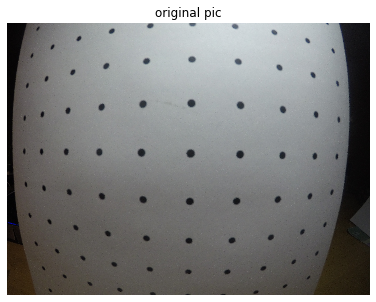

In [203]:
image_disp(image,'original pic')

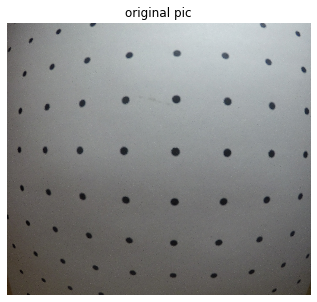

In [212]:
image_disp(image[80:-50,250:-550],'original pic')

In [213]:
nimage = image[80:-50,250:-550]

In [214]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [215]:
gimage = rgb2gray(nimage)

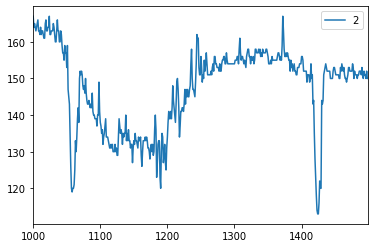

In [69]:
pd.DataFrame(nimage[:,400])[[2]].iloc[1000:1500].plot()

In [288]:
def gimage_disp(gimage):
    plt.figure(figsize=(10,5))
    plt.subplots_adjust(wspace=0.05, hspace=0.1)

    plt.subplot()
    plt.imshow(gimage, cmap='gray', vmin=0, vmax=255)

    # plt.title(title)
#     plt.axis('off')

    plt.show()

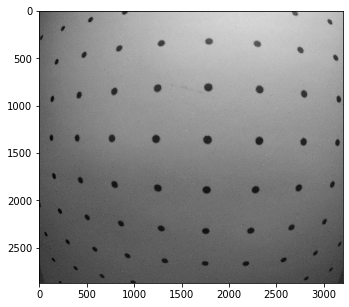

In [289]:
gimage_disp(gimage)

In [290]:
fgimage = gaussian_filter(gimage, sigma=50)

In [305]:
def norm(d,scale):
    return ((d-np.min(d))/(np.max(d)-np.min(d)))*scale

In [292]:
nfi = norm(gimage-fgimage,255)

In [317]:
fnfi = gaussian_filter(nfi, sigma=5)

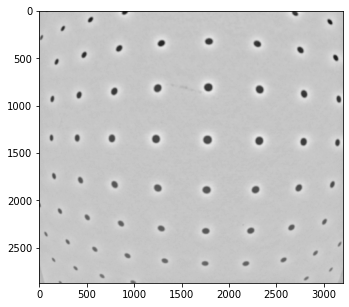

In [318]:
gimage_disp(fnfi)

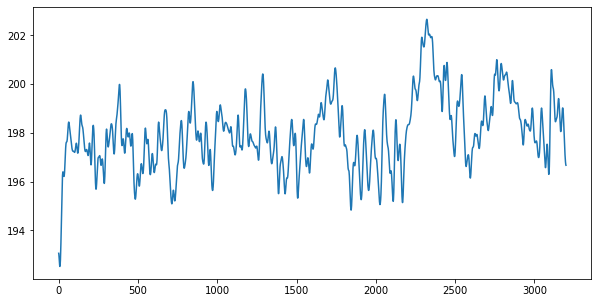

In [319]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot()
plt.plot(fnfi[1500,:])

# plt.title(title)
# plt.axis('off')

plt.show()

In [357]:
fnfi = gaussian_filter(nfi, sigma=5)
limit = np.mean(fnfi)-2*np.std(fnfi)
print(limit)
fnfi > limit
fnfi[fnfi > limit] = 1
fnfi[fnfi != 1 ] = 0

165.59503630327515


In [358]:
fnfi

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

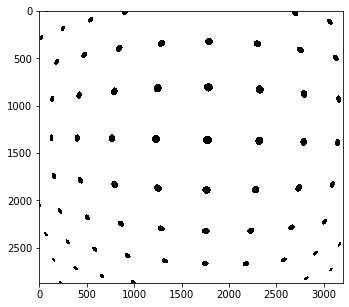

In [359]:
gimage_disp(fnfi*255)

In [360]:
result = np.where(fnfi == 0)

In [361]:
result[1]

array([  73,   74,   75, ..., 1018, 1019, 1020], dtype=int64)

In [362]:
np.transpose(result)

array([[   0,   73],
       [   0,   74],
       [   0,   75],
       ...,
       [2869, 1018],
       [2869, 1019],
       [2869, 1020]], dtype=int64)

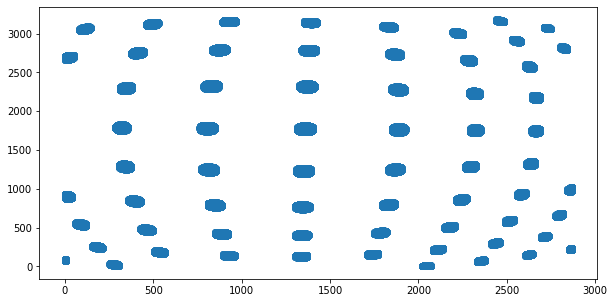

In [363]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot()

plt.scatter(result[0],result[1])

plt.show()

In [369]:
df = pd.DataFrame(np.transpose(result),columns = ['x','y'])
df_red = df[(df['x']>600) & (df['x']<2000) & (df['y']>600) & (df['y']<2000) ]

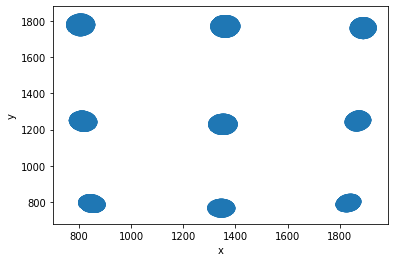

In [372]:
df_red.plot.scatter(x = 'x',y = 'y')

In [378]:
k = 9
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(df_red.values)

In [380]:
df_c = pd.DataFrame(kmeans.cluster_centers_,columns = ['cx','cy'])


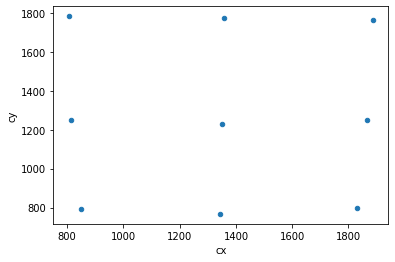

In [381]:
df_c.plot.scatter(x = 'cx',y = 'cy')

In [251]:
a1 = np.array([[1,2,3],[3,4,3]])
a2 = np.array([[2,2],[2,2]])

In [252]:
n = dd0[:l[0],:l[1]]+dd1[:l[0],:l[1]]

In [253]:
nn = (n-np.min(n))/(np.max(n)-np.min(n))

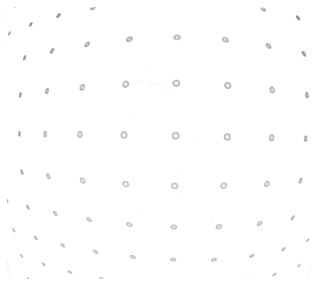

In [262]:
gimage_disp(255-(n*255))

In [257]:
nn = (n-np.min(n))/(np.max(n)-np.min(n))
lim = .3
nn[nn > lim] = 1
nn[nn <= lim] = 0

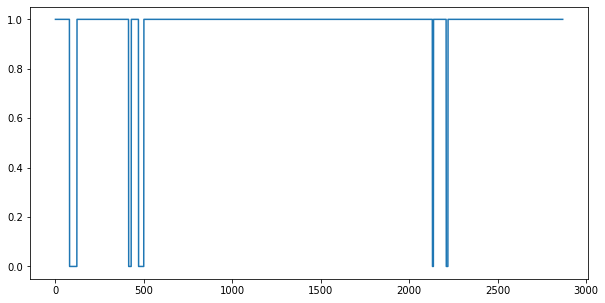

In [258]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot()

plt.plot(nn[:,500])
# plt.title(title)
# plt.axis('off')

plt.show()

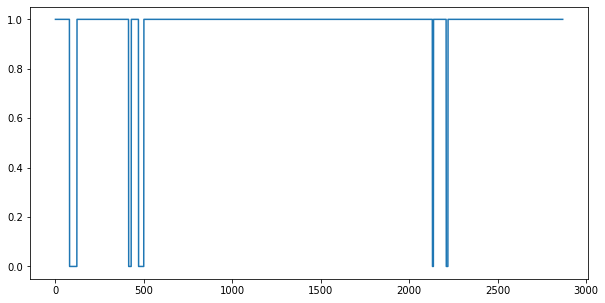

In [259]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot()

plt.plot(nn[:,500])
# plt.title(title)
# plt.axis('off')

plt.show()

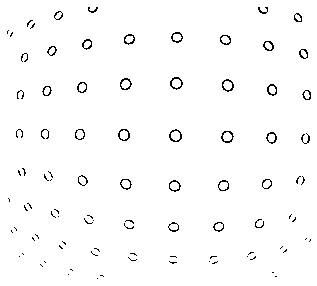

In [261]:
gimage_disp(nn*255)